# Leaf Classification
______

The dataset we would be considering in this example is the Leaf dataset which consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species.

It can be downloaded from : https://archive.ics.uci.edu/ml/datasets/Leaf

Attribute Information:

1. Class (Species) 
2. Specimen Number 
3. Eccentricity 
4. Aspect Ratio 
5. Elongation 
6. Solidity 
7. Stochastic Convexity 
8. Isoperimetric Factor 
9. Maximal Indentation Depth 
10. Lobedness 
11. Average Intensity 
12. Average Contrast 
13. Smoothness 
14. Third moment 
15. Uniformity 
16. Entropy

In [1]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [2]:
# read .csv from provided dataset
csv_filename="leaf/leaf.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename,
              names=["Class", "No" , "Eccentricity" , "Aspect-Ratio" , "Elongation" , "Solidity",
                     "Stochastic-Convexity", "Isoperimetric-Factor" , "Max-Indentation-Depth" ,
                     "Lobedness" , "Avg-Intensity" , "Avg-Contrast" , "Smoothness" ,
                     "Third-Moment" , "Uniformity" , "Entropy"])

In [3]:
df.head()

,Class,No,Eccentricity,Aspect-Ratio,Elongation,Solidity,Stochastic-Convexity,Isoperimetric-Factor,Max-Indentation-Depth,Lobedness,Avg-Intensity,Avg-Contrast,Smoothness,Third-Moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [4]:
df.describe()

,Class,No,Eccentricity,Aspect-Ratio,Elongation,Solidity,Stochastic-Convexity,Isoperimetric-Factor,Max-Indentation-Depth,Lobedness,Avg-Intensity,Avg-Contrast,Smoothness,Third-Moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,18.544118,6.282353,0.719854,2.440210,0.513760,0.904158,0.943793,0.531234,0.037345,0.523845,0.051346,0.124535,0.017670,0.005928,0.000387,1.162630
std,11.152514,3.462779,0.208311,2.599043,0.195583,0.114639,0.115047,0.217532,0.038575,1.039639,0.035965,0.051860,0.013755,0.005294,0.000431,0.584854
min,1.000000,1.000000,0.117080,1.006600,0.107610,0.485490,0.396490,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,9.000000,3.000000,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,15.000000,6.000000,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,29.000000,9.000000,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,36.000000,16.000000,0.998710,19.038000,0.948340,0.993880,1.000000,0.858160,0.198980,7.206200,0.190670,0.280810,0.073089,0.029786,0.002936,2.708500


In [21]:
#Convert animal labels to numbers
le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df.Class)

In [8]:
df['Class'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], dtype=int64)

In [9]:
features = list(df.columns)

In [10]:
features.remove('Class')

In [12]:
df.shape

(340, 16)

In [29]:
for f in features:

    #Get binarized columns
    df[f] = pd.get_dummies(df[f])
 
    # Build new array
# train_data = pd.concat([hour, days, district], axis=1)
# train_data['crime']=crime

In [30]:
df.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,0.0,0.0,1.0,1.0,0.0,0.0,2
1,0.0,0.0,1.0,1.0,0.0,0.0,2
2,0.0,0.0,1.0,1.0,0.0,1.0,2
3,0.0,0.0,1.0,1.0,0.0,0.0,2
4,0.0,0.0,1.0,1.0,0.0,0.0,2


In [14]:
X = df[features]
y = df['Class']

In [15]:
X.describe()

,No,Eccentricity,Aspect-Ratio,Elongation,Solidity,Stochastic-Convexity,Isoperimetric-Factor,Max-Indentation-Depth,Lobedness,Avg-Intensity,Avg-Contrast,Smoothness,Third-Moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,6.282353,0.719854,2.440210,0.513760,0.904158,0.943793,0.531234,0.037345,0.523845,0.051346,0.124535,0.017670,0.005928,0.000387,1.162630
std,3.462779,0.208311,2.599043,0.195583,0.114639,0.115047,0.217532,0.038575,1.039639,0.035965,0.051860,0.013755,0.005294,0.000431,0.584854
min,1.000000,0.117080,1.006600,0.107610,0.485490,0.396490,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,3.000000,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,6.000000,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,9.000000,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,16.000000,0.998710,19.038000,0.948340,0.993880,1.000000,0.858160,0.198980,7.206200,0.190670,0.280810,0.073089,0.029786,0.002936,2.708500


In [16]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [17]:
print X_train.shape, y_train.shape

(204, 15) (204L,)


### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 4 - Solidity (0.101565) 
2. feature 3 - Elongation (0.091025) 
3. feature 2 - Aspect-Ratio (0.088494) 
4. feature 6 - Isoperimetric-Factor (0.088481) 
5. feature 1 - Eccentricity (0.079418) 
6. feature 7 - Max-Indentation-Depth (0.069209) 
7. feature 8 - Lobedness (0.064789) 
8. feature 14 - Entropy (0.064162) 
9. feature 5 - Stochastic-Convexity (0.057478) 
10. feature 10 - Avg-Contrast (0.056595) 
11. feature 12 - Third-Moment (0.055509) 
12. feature 13 - Uniformity (0.053986) 
13. feature 11 - Smoothness (0.053312) 
14. feature 9 - Avg-Intensity (0.052884) 
15. feature 0 - No (0.023093) 


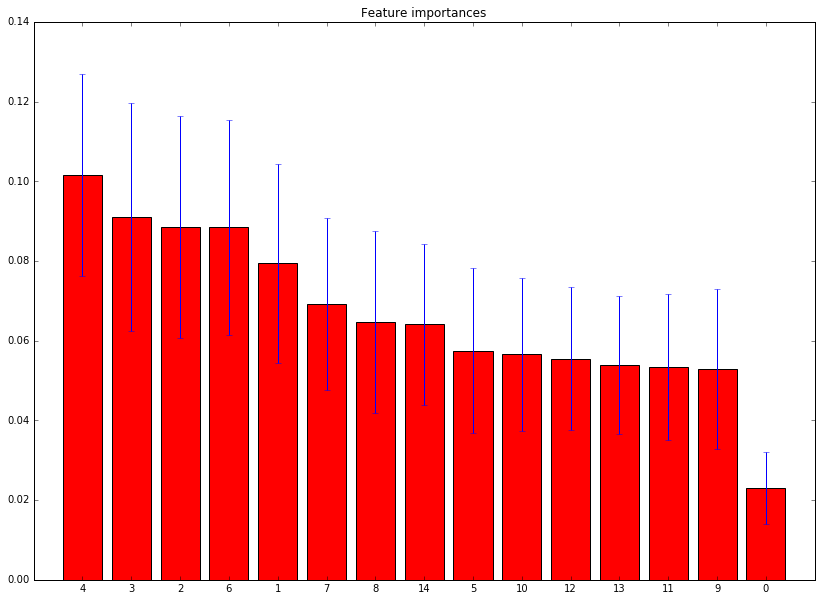

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [19]:
importances[indices[:5]]

array([ 0.10156511,  0.09102479,  0.08849443,  0.08848106,  0.07941827])

In [20]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 4 - Solidity (0.101565)
2. feature 3 - Elongation (0.091025)
3. feature 2 - Aspect-Ratio (0.088494)
4. feature 6 - Isoperimetric-Factor (0.088481)
5. feature 1 - Eccentricity (0.079418)


In [21]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

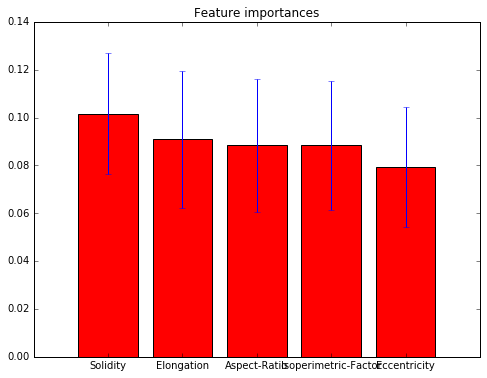

In [22]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

# Decision Tree accuracy and time elapsed caculation

In [23]:
t0=time()
print "DecisionTree"

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print "Acurracy: ", clf_dt.score(X_test,y_test)
t1=time()
print "time elapsed: ", t1-t0

DecisionTree
Acurracy:  0.389705882353
time elapsed:  0.0139999389648


## cross validation for DT

In [24]:
tt0=time()
print "cross result========"
scores = cross_validation.cross_val_score(dt, X, y, cv=3)
print scores
print scores.mean()
tt1=time()
print "time elapsed: ", tt1-tt0
print "\n"

cross result========
[ 0.45528455  0.38596491  0.49514563]
0.445465032065
time elapsed:  0.121000051498




### Tuning our hyperparameters using GridSearch

In [25]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)

print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   17.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.551
Best parameters set:
	clf__max_depth: 25
	clf__min_samples_leaf: 3
	clf__min_samples_split: 5
             precision    recall  f1-score   support

          1       0.67      0.40      0.50         5
          2       0.33      0.40      0.36         5
          3       0.40      0.50      0.44         4
          4       0.50      0.33      0.40         3
          5       0.43      1.00      0.60         3
          6       0.40      0.40      0.40         5
          7       0.00      0.00      0.00         6
          8       1.00      0.50      0.67         4
          9       0.50      0.40      0.44         5
         10       1.00      1.00      1.00         6
         11       1.00      0.75      0.86         4
         12       0.80      0.67      0.73         6
         13       0.46      0.75      0.57         8
         14       0.80      0.67      0.73         6
         15       1.00      0.4

C:\Miniconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest accuracy and time elapsed caculation

In [26]:
t2=time()
print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print "Acurracy: ", clf_rf.score(X_test,y_test)
t3=time()
print "time elapsed: ", t3-t2

RandomForest
Acurracy:  0.683823529412
time elapsed:  1.16700005531


## cross validation for RF

In [27]:
tt2=time()
print "cross result========"
scores = cross_validation.cross_val_score(rf, X, y, cv=3)
print scores
print scores.mean()
tt3=time()
print "time elapsed: ", tt3-tt2
print "\n"


cross result========
[ 0.66666667  0.79824561  0.76699029]
0.743967523988
time elapsed:  3.51099991798




### Tuning Models using GridSearch

In [28]:
pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print classification_report(y_test, predictions)
    

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   37.8s finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best score: 0.716
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 1
	clf__min_samples_split: 1
	clf__n_estimators: 50
Accuracy: 0.698529411765
             precision    recall  f1-score   support

          1       1.00      0.80      0.89         5
          2       0.67      0.40      0.50         5
          3       1.00      0.50      0.67         4
          4       0.67      0.67      0.67         3
          5       0.60      1.00      0.75         3
          6       1.00      0.60      0.75         5
          7       1.00      0.50      0.67         6
          8       1.00      1.00      1.00         4
          9       0.38      0.60      0.46         5
         10       0.71      0.83      0.77         6
         11       0.67      1.00      0.80         4
         12       0.55      1.00      0.71         6
         13       0.78      0.88      0.82         8
         14       1.00      0.50  

# Naive Bayes accuracy and time elapsed caculation


In [29]:
t4=time()
print "NaiveBayes"
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print "Acurracy: ", clf_nb.score(X_test,y_test)
t5=time()
print "time elapsed: ", t5-t4

NaiveBayes
Acurracy:  0.0294117647059
time elapsed:  0.018000125885


## cross-validation for NB

In [30]:
tt4=time()
print "cross result========"
scores = cross_validation.cross_val_score(nb, X,y, cv=3)
print scores
print scores.mean()
tt5=time()
print "time elapsed: ", tt5-tt4
print "\n"

cross result========
[ 0.04878049  0.04385965  0.04854369]
0.047061275416
time elapsed:  0.0650000572205




# KNN accuracy and time elapsed caculation

In [31]:
t6=time()
print "KNN"
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3)
clf_knn=knn.fit(X_train, y_train)
print "Acurracy: ", clf_knn.score(X_test,y_test) 
t7=time()
print "time elapsed: ", t7-t6

KNN
Acurracy:  0.0955882352941
time elapsed:  0.00799989700317


## cross validation for KNN

In [32]:
tt6=time()
print "cross result========"
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print scores
print scores.mean()
tt7=time()
print "time elapsed: ", tt7-tt6
print "\n"

cross result========
[ 0.1686747   0.13513514  0.07692308  0.16666667  0.15517241]
0.140514398263
time elapsed:  0.0729999542236




### Fine tuning the model using GridSearch

In [33]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,10]}

grid = grid_search.GridSearchCV(knn, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best score: 0.186
Best parameters set:
	n_neighbors: 1
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         5
          2       0.00      0.00      0.00         5
          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.50      0.20      0.29         5
          7       0.00      0.00      0.00         6
          8       1.00      1.00      1.00         4
          9       0.00      0.00      0.00         5
         10       0.00      0.00      0.00         6
         11       0.50      0.75      0.60         4
         12       0.00      0.00      0.00         6
         13       0.00      0.00      0.00         8
         14       0.00      0.00      0.00         6
         15       0.50      0.20      0.29         5
         22       0.00      0.00     

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   13.1s finished


# SVM accuracy and time elapsed caculation

In [34]:
t7=time()
print "SVM"

svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print "Acurracy: ", clf_svc.score(X_test,y_test) 
t8=time()
print "time elapsed: ", t8-t7

SVM
Acurracy:  0.132352941176
time elapsed:  0.0260000228882


## cross validation for SVM

In [35]:
tt7=time()
print "cross result========"
scores = cross_validation.cross_val_score(svc,X,y, cv=5)
print scores
print scores.mean()
tt8=time()
print "time elapsed: ", tt7-tt6
print "\n"

cross result========
[ 0.18072289  0.2027027   0.24615385  0.21666667  0.15517241]
0.200283704177
time elapsed:  34.7860000134




In [36]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = grid_search.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score: 0.515
Best parameters set:
	C: 10
	kernel: 'linear'
             precision    recall  f1-score   support

          1       0.62      1.00      0.77         5
          2       0.50      0.20      0.29         5
          3       1.00      0.75      0.86         4
          4       0.20      0.33      0.25         3
          5       0.38      1.00      0.55         3
          6       0.57      0.80      0.67         5
          7       0.62      0.83      0.71         6
          8       1.00      1.00      1.00         4
          9       0.60      0.60      0.60         5
         10       1.00      0.67      0.80         6
         11       0.75      0.75      0.75         4
         12       0.33      0.17      0.22         6
         13       0.67      0.25      0.36         8
         14       0.20      0.17      0.18         6
         15       0.71      1.00      0.83         5
         22       1.00     

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.0s finished


In [37]:
pipeline = Pipeline([
    ('clf', SVC(kernel='linear', gamma=0.01, C=10))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   19.0s finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.525
Best parameters set:
	clf__C: 30
	clf__gamma: 0.01
             precision    recall  f1-score   support

          1       0.71      1.00      0.83         5
          2       0.50      0.20      0.29         5
          3       1.00      0.75      0.86         4
          4       0.17      0.33      0.22         3
          5       0.43      1.00      0.60         3
          6       0.57      0.80      0.67         5
          7       0.83      0.83      0.83         6
          8       1.00      1.00      1.00         4
          9       0.33      0.40      0.36         5
         10       0.80      0.67      0.73         6
         11       0.75      0.75      0.75         4
         12       0.20      0.17      0.18         6
         13       0.67      0.25      0.36         8
         14       0.33      0.17      0.22         6
         15       0.67      0.80      0.73         5
         22       1.0

___